# Understanding Convolution

In mathematics (in particular, functional analysis), convolution is a mathematical operation on two functions (f and g) that produces a third function ${\displaystyle f*g}$ that expresses how the shape of one is modified by the other. The term convolution refers to both the result function and to the process of computing it. It is defined as the integral of the product of the two functions after one is reversed and shifted. The integral is evaluated for all values of shift, producing the convolution function.


$(f * g)(t) := \int_{-\infty}^\infty f(\tau) g(t - \tau) \, d\tau$


$(f * g)(t) := \int_{-\infty}^\infty f(t-\tau) g(\tau)\, d\tau$


$g(x,y)= \omega *f(x,y)=\sum_{dx=-a}^a{\sum_{dy=-b}^b{ \omega (dx,dy)f(x+dx,y+dy)}}$

- matrix convolution

        255 255 255      1  -1   1    (255 x 1)+(255 x -1)+(255 x 1) +
        255 100 255  x  -1   0  -1  = (255 x -1)+(100 x 0)+(255 x -1) +   = -155
        100 100 100      1  -1   1    (100 x1 )+(100 x -1)+(100 x 1)

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import signal



style.use('ggplot')
%matplotlib inline

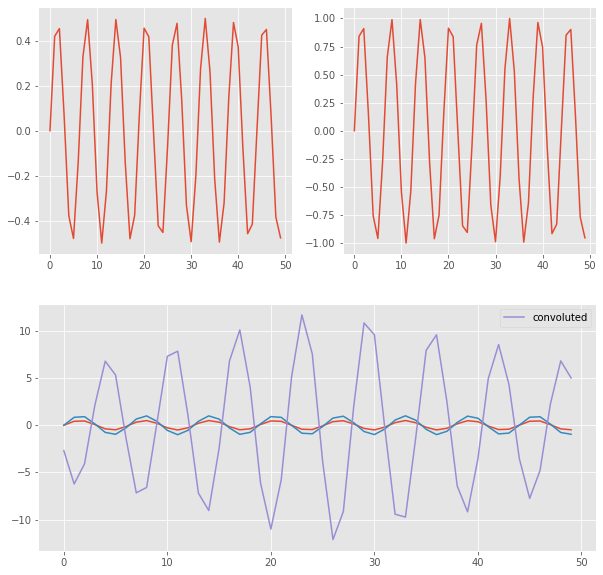

In [2]:
sine_signal1 = np.sin(range(50)) * 0.5
sine_signal2 = np.sin(range(50))
new_sine_singal = np.convolve(sine_signal1,sine_signal2,mode='same')

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,2,1)
ax.plot(sine_signal1)

ax = fig.add_subplot(2,2,2)
ax.plot(sine_signal2)

ax = fig.add_subplot(2,2,(3,4))
ax.plot(sine_signal1)
ax.plot(sine_signal2)
ax.plot(new_sine_singal,label='convoluted')

plt.legend()
plt.show()

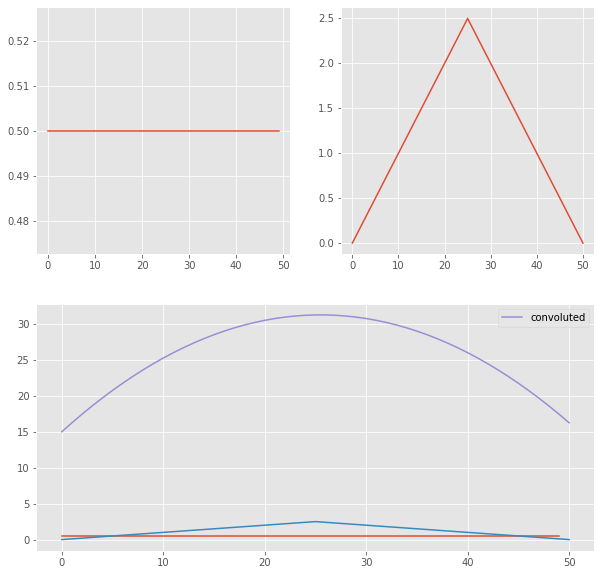

In [3]:
signal1 = np.ones(50) * 0.5
signal2 = np.array([i for i in range(0,26)] + [i for i in range(0,25)][::-1]) * 0.1
new_singal = np.convolve(signal1,signal2,mode='same')

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,2,1)
ax.plot(signal1)

ax = fig.add_subplot(2,2,2)
ax.plot(signal2)

ax = fig.add_subplot(2,2,(3,4))
ax.plot(signal1)
ax.plot(signal2)
ax.plot(new_singal,label='convoluted')

plt.legend()
plt.show()

## Signal Convolution

In [4]:
signal_line = np.random.randn(100)

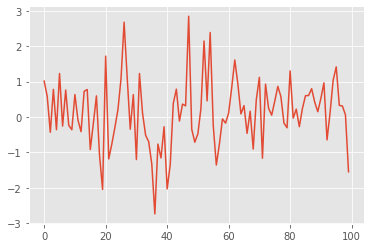

In [5]:
plt.plot(signal_line)

In [6]:
window = 5
smoothing_signal = np.ones(window) / float(window)

In [7]:
new_signal_line = np.convolve(signal_line,smoothing_signal,mode='same')

In [8]:
new_signal_line

array([ 2.33020933e-01,  3.89264024e-01,  3.17781865e-01,  3.60558823e-01,
        1.93505888e-01,  4.32053159e-01,  2.28810337e-01,  2.28665483e-01,
        1.09933921e-01,  1.43064928e-01, -9.21215053e-02,  1.00100625e-01,
        3.27212097e-01,  1.67189453e-02, -9.82645830e-04,  2.01172032e-01,
       -1.57952782e-01, -7.22205195e-01, -1.94716176e-01, -3.95691980e-01,
       -6.68199127e-01, -5.13471140e-01, -6.24047596e-02, -1.89500148e-01,
        5.82519955e-01,  9.59965471e-01,  9.50442959e-01,  1.03454009e+00,
        5.77562144e-01,  2.88043999e-01,  8.48004943e-02,  5.06315828e-02,
       -2.15075404e-01, -2.39452902e-01, -1.03244747e+00, -1.20622229e+00,
       -1.33423226e+00, -1.24970958e+00, -1.39100366e+00, -1.11386171e+00,
       -8.83992858e-01, -4.95765848e-01, -4.63765490e-01,  1.50607058e-02,
        3.47958711e-01,  8.39831547e-01,  6.13413565e-01,  4.94154530e-01,
        3.26510608e-01,  3.13861828e-01,  1.74025574e-01,  3.34383595e-01,
        9.53798456e-01,  

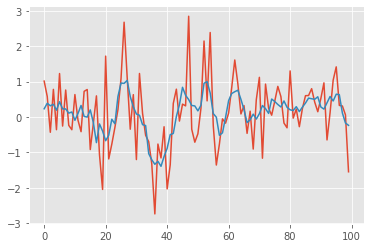

In [9]:
plt.plot(signal_line)
plt.plot(new_signal_line)

## Image Convolution

In [10]:
a = np.array(mpimg.imread("./images/rdj.jpg"))
a.shape

(550, 550, 3)

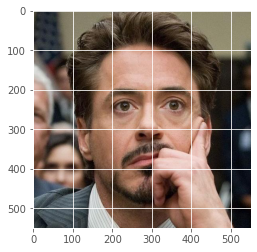

In [11]:
plt.imshow(a)

### Compress image

> array[::a,::a] --> every 3 index from rows and columns 

In [12]:
x = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [5,67,7,7]
])
x[::3,::3]

array([[1, 4]])

### converting to float

In [13]:
a = a[::4,::4] / 255

In [14]:
a.shape

(138, 138, 3)

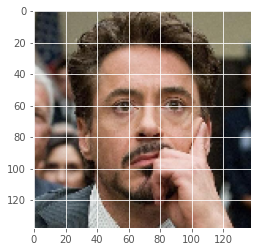

In [15]:
plt.imshow(a)

In [16]:
def apply_filter(mat, conv_filter):
    mapped_1 = signal.convolve2d(mat[:,:,0],conv_filter,mode='same')
    mapped_2 = signal.convolve2d(mat[:,:,1],conv_filter,mode='same')
    mapped_3 = signal.convolve2d(mat[:,:,2],conv_filter,mode='same')
    new_mat = np.dstack((mapped_1,mapped_2,mapped_3))
    
    return new_mat

## Edge Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


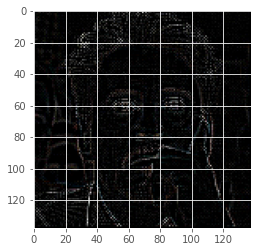

In [17]:
filter_mat = np.array([
    [1, -1, 1],
    [-1, 0, -1],
    [1, -1, 1]
])

plt.imshow(apply_filter(a,filter_mat))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


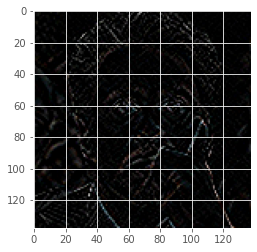

In [18]:
filter_mat = np.array([
    [1, 0, -1],
    [0, 0, 0],
    [-1, 0, 1]
])
plt.imshow(apply_filter(a,filter_mat))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


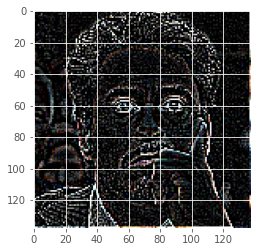

In [19]:
filter_mat = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
plt.imshow(apply_filter(a,filter_mat))

## Sharpen

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


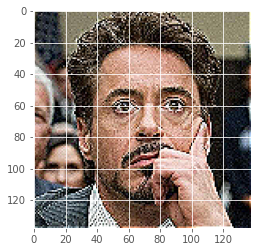

In [20]:
filter_mat = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
plt.imshow(apply_filter(a,filter_mat))

## Box Blur 

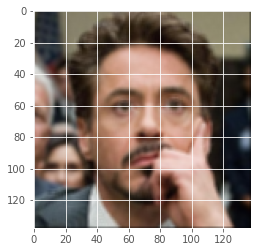

In [21]:
filter_mat = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) * 1/9
plt.imshow(apply_filter(a,filter_mat))

## Gaussian Blur 3X3

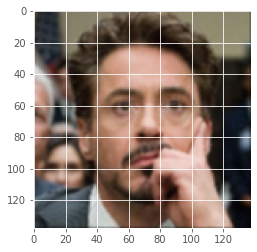

In [22]:
filter_mat = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) * 1/16
plt.imshow(apply_filter(a,filter_mat))

## Gaussian Blue 5X5

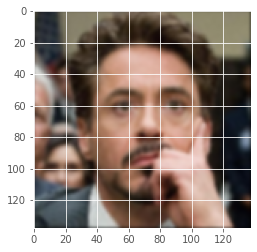

In [23]:
filter_mat = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * 1/256
plt.imshow(apply_filter(a,filter_mat))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


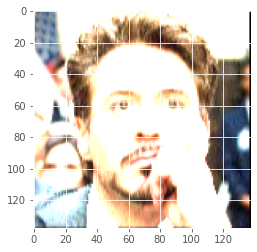

In [24]:
filter_mat = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0]
])
plt.imshow(apply_filter(a,filter_mat))